In [1]:
import numpy as np
import pandas as pd

from scipy import stats
import itertools
from sklearn import linear_model
from numpy import ones,vstack
from numpy.linalg import lstsq
pd.options.display.max_rows=400


In [2]:

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
housing = pd.read_csv(r'C:\Users\rauna\Machine_Learning_Ames_Housing_Kaggle\Raunak_P\Ames_HousePrice.csv')

In [4]:
housing.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
PID,909176150,905476230,911128020,535377150,534177230
GrLivArea,856,1049,1001,1039,1665
SalePrice,126000,139500,124900,114000,227000
MSSubClass,30,120,30,70,60
maybe_MSZoning,RL,RL,C (all),RL,RL
LotFrontage,NaN,42.0,60.0,80.0,70.0
LotArea,7890,4235,6060,8146,8400
Street_paved,Pave,Pave,Pave,Pave,Pave
Alley,No alley access,No alley access,No alley access,No alley access,No alley access


In [5]:
correlation = housing.corr().abs()

s = correlation.unstack()
sortedcor = s.sort_values(kind="quicksort", ascending=False).drop_duplicates()
sortedcor=sortedcor[sortedcor<1]
#so2=so[so['']]

In [6]:
print(sortedcor.head(50))

SalePrice_log    SalePrice          0.950051
LotFrontage      LotFrontage_log    0.946413
GarageCars       GarageArea         0.889603
Fireplaces       FireplaceQu        0.859476
GarageYrBlt      YearBuilt          0.834526
OverallQual      SalePrice_log      0.815961
TotRmsAbvGrd     GrLivArea          0.807445
SalePrice        OverallQual        0.790501
1stFlrSF         TotalBsmtSF        0.784271
LotFrontage_log  LotArea_log        0.769274
2ndFlrSF         number_floors      0.726882
SalePrice        GrLivArea          0.719981
SalePrice_log    GrLivArea          0.717711
ExterQual        OverallQual        0.714140
LotArea_log      LotArea            0.708821
KitchenQual      ExterQual          0.697801
MSSubClass       PUD                0.693861
BedroomAbvGr     TotRmsAbvGrd       0.693223
LotArea_log      LotFrontage        0.687621
PUD              LotFrontage_log    0.683868
SalePrice        ExterQual          0.682470
GarageCars       SalePrice_log      0.666527
SalePrice_

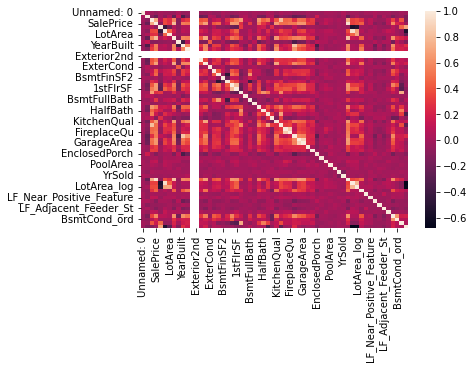

In [7]:
sns.heatmap(housing.corr());

In [8]:
# Returns correlation matrix
def corrFilter(x: pd.DataFrame, bound: float):
    xCorr = x.corr()
    xFiltered = xCorr[((xCorr >= bound) | (xCorr <= -bound)) & (xCorr !=1.000)]
    return xFiltered

# flattens correlation matrix with bounds
def corrFilterFlattened(x: pd.DataFrame, bound: float):
    xFiltered = corrFilter(x, bound)
    xFlattened = xFiltered.unstack().sort_values().drop_duplicates()
    return xFlattened

# Returns correlation for a variable from flattened correlation matrix
def filterForLabels(housing: pd.DataFrame, label):  
    try:
        sideLeft = housing[label,]
    except:
        sideLeft = pd.DataFrame()

    try:
        sideRight = housing[:,label]
    except:
        sideRight = pd.DataFrame()

    if sideLeft.empty and sideRight.empty:
        return pd.DataFrame()
    elif sideLeft.empty:        
        concat = sideRight.to_frame()
        concat.rename(columns={0:'Corr'},inplace=True)
        return concat
    elif sideRight.empty:
        concat = sideLeft.to_frame()
        concat.rename(columns={0:'Corr'},inplace=True)
        return concat
    else:
        concat = pd.concat([sideLeft,sideRight], axis=1)
        concat["Corr"] = concat[0].fillna(0) + concat[1].fillna(0)
        concat.drop(columns=[0,1], inplace=True)
        return concat

def NEGcorrFilter(x: pd.DataFrame, bound: float):
    xCorr = x.corr()
    xFiltered = xCorr[((xCorr <= bound) & (xCorr >= -bound)) & (xCorr !=1.000)]
    return xFiltered

In [9]:
corrFilter(housing,.5)

,Unnamed: 0,PID,GrLivArea,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,...,LF_Near_NS_RR,LF_Near_Positive_Feature,LF_Adjacent_Arterial_St,LF_Near_EW_RR,LF_Adjacent_Feeder_St,LF_Near_Postive_Feature,BsmtQual_ord,BsmtCond_ord,number_floors,PUD
Unnamed: 0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GrLivArea,NaN,NaN,NaN,0.719981,NaN,NaN,NaN,0.559897,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SalePrice,NaN,NaN,0.719981,NaN,NaN,NaN,NaN,0.790501,NaN,0.544370,...,NaN,NaN,NaN,NaN,NaN,NaN,0.587704,NaN,NaN,NaN
MSSubClass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.693861
LotFrontage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.535223
LotArea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OverallQual,NaN,NaN,0.559897,0.790501,NaN,NaN,NaN,NaN,NaN,0.574400,...,NaN,NaN,NaN,NaN,NaN,NaN,0.622697,NaN,NaN,NaN
OverallCond,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YearBuilt,NaN,NaN,NaN,0.544370,NaN,NaN,NaN,0.574400,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.611268,NaN,NaN,NaN


In [10]:
housing2=pd.get_dummies(housing)
housing2=housing2.fillna(0)
lm=linear_model.LinearRegression()
lm.fit(housing2.drop(['SalePrice','SalePrice_log'],axis=1), housing2['SalePrice_log'])
lm.score(housing2.drop(['SalePrice','SalePrice_log'],axis=1), housing2['SalePrice_log'])

0.9382590730259728

In [11]:
import seaborn as sns

corr = housing2.corr();
print(corr)

                                                    Unnamed: 0       PID  \
Unnamed: 0                                            1.000000  0.031444   
PID                                                   0.031444  1.000000   
GrLivArea                                            -0.009719 -0.102270   
SalePrice                                            -0.056652 -0.226276   
MSSubClass                                            0.002765 -0.005328   
LotFrontage                                          -0.025818 -0.031715   
LotArea                                              -0.030839  0.042049   
OverallQual                                          -0.043861 -0.247168   
OverallCond                                           0.032944  0.120013   
YearBuilt                                            -0.055302 -0.337963   
YearRemodAdd                                         -0.043235 -0.128744   
Exterior1st                                                NaN       NaN   
Exterior2nd 

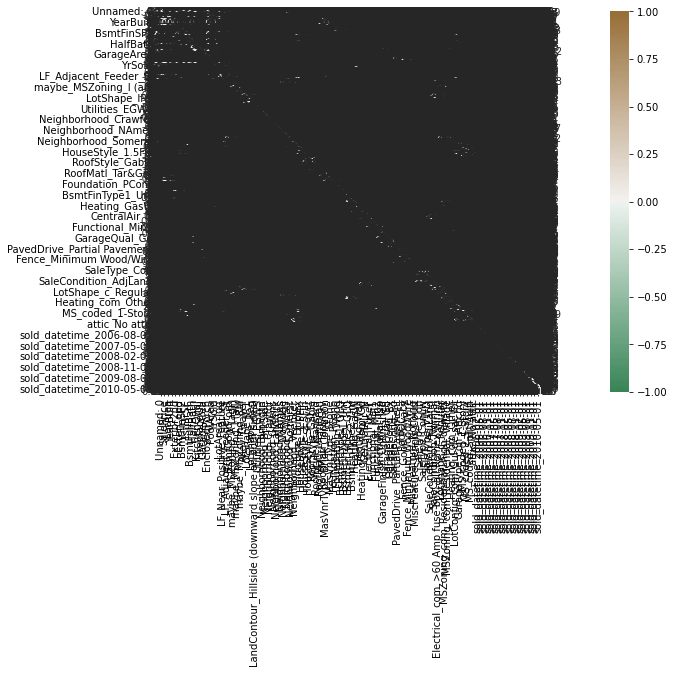

In [13]:
plt.figure(figsize=(25,7))
sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(500, 50, n=200), square=True, annot=True);